In [1]:
!pip install Missingno


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import missingno as m

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('melb_data.csv')
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

(13580, 21)

In [4]:
X = df.drop('Price',axis = 'columns')
y = df.Price

<AxesSubplot:>

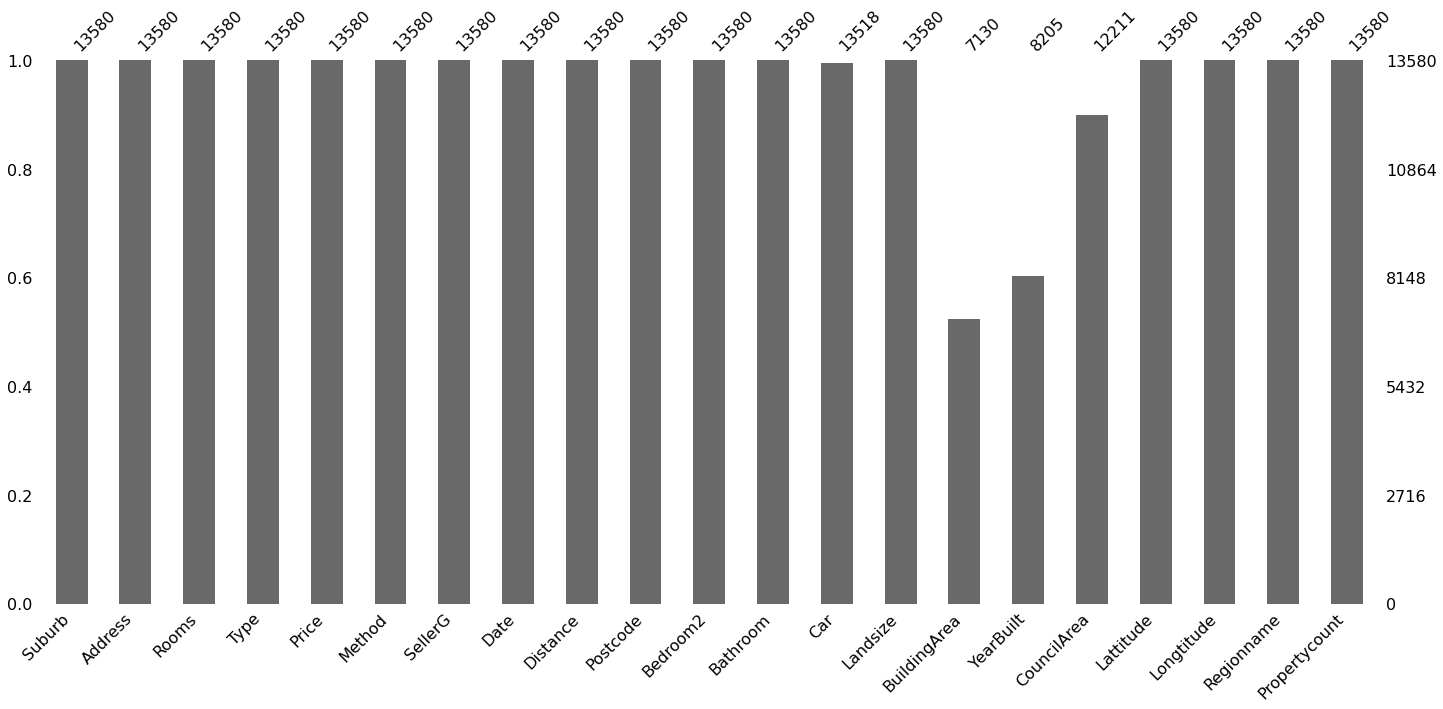

In [5]:
m.bar(df)

In [6]:
numerical_cols = df.select_dtypes(exclude=['object'])
catogerical_col = df.select_dtypes(include=['object'])

In [7]:

numerical_cols.drop('Price',axis = 'columns',inplace=True)
numerical_cols.isnull().sum()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Rooms               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [8]:
catogerical_col.columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [9]:
cat_list = [col for col in catogerical_col.columns if catogerical_col[col].nunique()<10]
cat_list

['Type', 'Method', 'Regionname']

In [10]:
num_col = [col for col in numerical_cols.columns]
num_col

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [11]:
df = df[cat_list+num_col]
df


,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,h,S,Northern Metropolitan,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,h,S,Northern Metropolitan,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,h,SP,Northern Metropolitan,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,h,PI,Northern Metropolitan,3,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,h,VB,Northern Metropolitan,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,h,S,South-Eastern Metropolitan,4,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,h,SP,Western Metropolitan,3,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,h,S,Western Metropolitan,3,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,h,PI,Western Metropolitan,4,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer

num_preprocessing = Pipeline(steps = [('impute',SimpleImputer(strategy='constant',fill_value = -99999)),])

cat_preprocessing = Pipeline(steps=[
    ('impute',SimpleImputer(strategy = 'constant',fill_value = 'missing')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))])

preprocessing = ColumnTransformer([
    ('num',num_preprocessing,num_col),
    ('cat',cat_preprocessing,cat_list),
    ])
preprocessing


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value=-99999,
                                                                strategy='constant'))]),
                                 ['Rooms', 'Distance', 'Postcode', 'Bedroom2',
                                  'Bathroom', 'Car', 'Landsize', 'BuildingArea',
                                  'YearBuilt', 'Lattitude', 'Longtitude',
                                  'Propertycount']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                  

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100,random_state=0)
pipeline_model= make_pipeline(preprocessing,model)
pipeline_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value=-99999,
                                                                                 strategy='constant'))]),
                                                  ['Rooms', 'Distance',
                                                   'Postcode', 'Bedroom2',
                                                   'Bathroom', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'YearBuilt', 'Lattitude',
                                                   'Longtitude',
                                                   'Propertycount']),
                                                 ('cat',
                                                  Pipelin

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:

pipeline_model.fit(X_train,y_train)
ypred = pipeline_model.predict(X_test)
ypred

array([1641823.88      ,  896713.33333333,  574805.        , ...,
       1300950.        , 1257650.        , 1093725.1       ])

In [28]:
Mae = mean_absolute_error(ypred,y_test)
Mae

161030.27160880849

In [15]:
pipeline_model.score(X_test,y_test)

0.8233902443129033

In [29]:
cross_val_score = -1*cross_val_score(pipeline_model,X,y,cv=5,scoring='neg_mean_absolute_error')

In [30]:
cross_val_score

array([207329.39306771, 194903.19013711, 187122.43445315, 151673.43073795,
       157966.36545726])

In [31]:
cross_val_score.mean()

179798.96277063608

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=34dbf458-e740-4033-94aa-35edddbb0a31' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>